**Objectives**
This notebook intends to provide:
*  EDA (Exploratory Data Analysis) on the breast cancer data.

*  Make prediction for status of a patient



Summary of our Exploration:

**AGE** 
* Most of the patients are aged **46** and they are **163** in number, while the least of the patients are aged **30** which is also the age of the youngest patients in our dataset; they are just **5** in number. 
* The oldest patients in our dataset are **69** years olds, and they are only **108** in number.
* Of all the total cancer patients, only **85%** of them are alive while the rest died.

**RACE**
* The **Black** race has a higher tendency to die from breast cancer as **25%** of their total population died from it. Slightly followed is the **White** race which has **15%** of their population die from breast cancer.
* The **Other** races has a lower tendency to die from breast cancer as only **10%** of their total population died from it.

**MARITAL STATUS**
* **Separated** patients has the higher tendency to die. This is so as about **33%** of its total population died from breast cancer. This may be as a result of loneliness and not being able to move on with their lives.
* The **Widowed** patients recorded as the second highest death in its total population. Having recorded **21%** death of its total population. This must have been as a result of loneliness.
* The **Divorced** patients is third on the list with a **19%** death of its total population.
* Followed closely to the **Divorced** patients is the **Single** patients having **17%** death of its total population. Meaning that a single patient, you are more likely to survive a breast cancer than a separated, widowed or a divorced patients.
* The **Married** patients has the least number of death of its total patients with **14%** death of its total population. The reason for this is not far-fetched: the support from the partner and the family members must have helped.

# 1. EDA (EXPLORATORY DATA ANALSIS)
**Step 1**: We import various module required for the objectives of this work. We also read and load the breast cancer data. **df** is the name of our dataset.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../input/breast-cancer/Breast_Cancer.csv')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


**Step 2**: We get the statistical description of our dataset

In [67]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


**Step 3**: We obtain information about our dataset showing their dtypes and non_null counts

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

**Step 4**: We obtain a list of all the columns of our dataset

In [69]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

# AGE

**Step 5**: We will be exploring the **Age** variable of our data

In [70]:
print(df["Age"].describe())

count    4024.000000
mean       53.972167
std         8.963134
min        30.000000
25%        47.000000
50%        54.000000
75%        61.000000
max        69.000000
Name: Age, dtype: float64


**Step 6**: We will obtain the counts of ages in the dataset and show the visual

In [71]:
print(df["Age"].value_counts().head())
print("\n",df["Age"].value_counts().tail())

46    163
49    162
47    161
53    155
55    154
Name: Age, dtype: int64

 33    15
31    14
34    14
32    13
30     5
Name: Age, dtype: int64


Text(0.5, 1.0, 'Value counts of Ages')

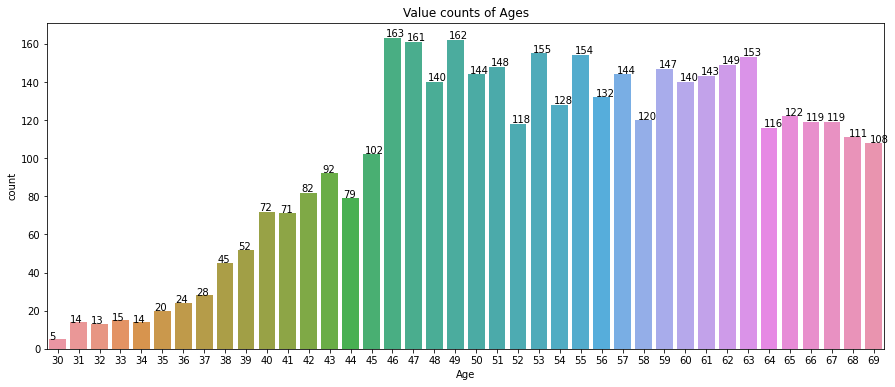

In [72]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df, x=df["Age"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Value counts of Ages")


We can see that most of the patients are aged **46** and they are **163** in number, while the least of the patients are aged **30** which is also the age of the youngest patients in our dataset; they are just **5** in number. We can also see that the oldest patients in our dataset are **69** years olds, and they are **108** in number.


**Step 7**: We want to get the number of patient that died and those are alive from our dataset. We will begin by determining the number of patients that are alive

In [73]:
age_alive = df.loc[df["Status"]=="Alive"]["Age"]
print("Number of patients alive: ", len(age_alive))


Number of patients alive:  3408


From the output above, we can see that of all the **4024** patients, only **3408** are alive. Showing a visual of the ages count pf those alive, we wll have:

Text(0.5, 1.0, 'Value counts of Ages')

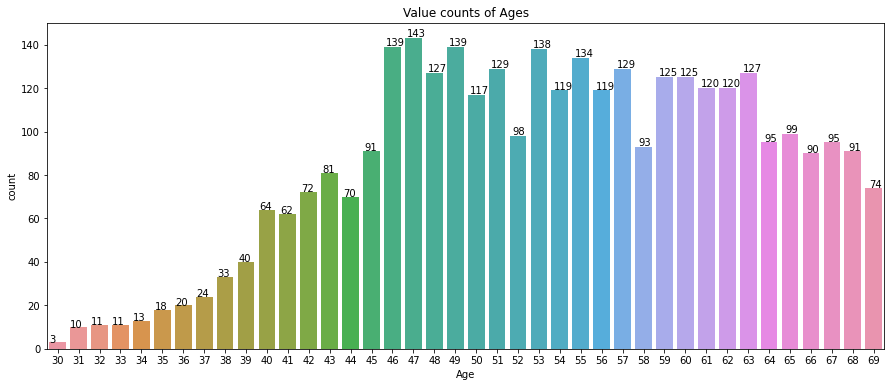

In [74]:
plt.figure(figsize=(15, 6))
ax =sns.countplot(data=age_alive, x=age_alive)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Value counts of Ages")


Now let us proceed with the number of patients that died.

**Step 8**: We obtain the number of patients who died

In [75]:
age_dead = df.loc[df["Status"]=="Dead"][["Age", "Status"]]
print("Number of patents who died: ", len(age_dead))

Number of patents who died:  616


We can see that **616** patients died. To obtain the percentage distribution of those who are alive and those dead. We can say:

In [76]:
print(str(round(len(age_alive)/len(df)*100))+ "% of the patients are alive wile " + str(100-round(len(age_alive)/len(df)*100))+"% died")

85% of the patients are alive wile 15% died


We can see that **15%** of the patients died, while the **85%** are alive.

**Step 9**: We show a visual to represent the age distribution of those that died and those alive

Text(0.5, 1.0, 'Patients who are alive and those who died')

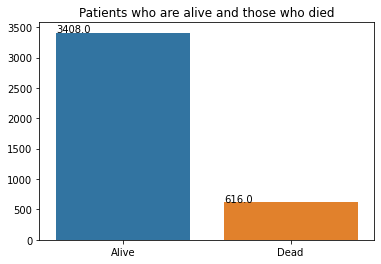

In [77]:
ax = sns.barplot(x=df["Status"].unique(), y=[len(age_alive), len(age_dead)])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.005, p.get_height()*1.005))
plt.title("Patients who are alive and those who died")

# RACE

**Step 10**: We obtain the unique values and the value counts of the **Race** variable

In [79]:
# obtaining the unique values
df["Race"].unique()

array(['White', 'Black', 'Other'], dtype=object)

In [80]:
# obtaining the unique value counts
df["Race"].value_counts()


White    3413
Other     320
Black     291
Name: Race, dtype: int64

**Step 11**: We create a visual to represent the counts of the different races 

<AxesSubplot:ylabel='Race'>

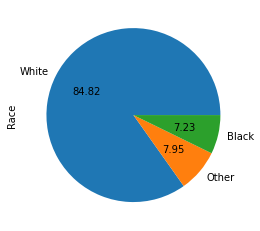

In [81]:
df["Race"].value_counts().plot(kind="pie",autopct='%.2f')

We can see that according to our data, **84.82%** are White, **7.95%** are Other race while **7.23%** are the Black race.


# THE WHITE RACE

**Step 12**: We will determine the white race that died and those that are alive. Don't forget that there are **3413** Whites.

In [82]:
# let us determine the white race in total
total_white = df.loc[df["Race"]=="White"][["Race", "Status"]]

# Let us determine the White race that are alive
white_alive = total_white.loc[total_white["Status"]=="Alive"]

# let us determine the White race that are dead
white_dead = total_white.loc[total_white["Status"]=="Dead"]

print("Total of Whihte race: ", len(total_white))
print("\nWhites that are Alive: ", len(white_alive))
print("\nWhites that are dead: ", len(white_dead))

print("\n% of Whites that are alive from the total White race: ", round((len(white_alive)/len(total_white)*100)), "%")
print("\n% of Whites that died from the total White race: ", round((len(white_dead)/len(total_white)*100)), "%")


Total of Whihte race:  3413

Whites that are Alive:  2903

Whites that are dead:  510

% of Whites that are alive from the total White race:  85 %

% of Whites that died from the total White race:  15 %


We can see that of all the **3413** White races, only **85%** of them that are alive while **15%** are dead.


**Step 13**: Lets show a visual representation of the white race, dead and alive.

Text(0.5, 1.0, 'White Race, Alive and Dead')

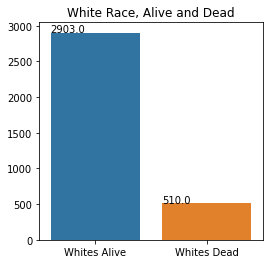

In [83]:
plt.figure(figsize=(4,4))
ax = sns.barplot(x=["Whites Alive", "Whites Dead"], y=[len(white_alive), len(white_dead)])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
plt.title("White Race, Alive and Dead")

# THE BLACK RACE

**Step 14**: We will determine the Black race that are alive and those who died. Don't forget that there are **291** Blacks.

In [84]:
# let us determine the Black race in total
total_black = df.loc[df["Race"]=="Black"][["Race", "Status"]]

# Let us determine the Black race that are alive
black_alive = total_black.loc[total_black["Status"]=="Alive"]

# let us determine the Black race that are dead
black_dead = total_black.loc[total_black["Status"]=="Dead"]

print("Total of Black race: ", len(total_black))
print("Blacks that are Alive: ", len(black_alive))
print("Blacks that are dead: ", len(black_dead))


print("\n% of Blacks that are alive from the total Black race: ", round((len(black_alive)/len(total_black)*100)), "%")
print("\n% of Blacks that died from the total Black race: ", round((len(black_dead)/len(total_black)*100)), "%")



Total of Black race:  291
Blacks that are Alive:  218
Blacks that are dead:  73

% of Blacks that are alive from the total Black race:  75 %

% of Blacks that died from the total Black race:  25 %


We can see that of all the **291** Black race, only **75%** of them are alive while **25%** are dead.

**Step 15**: Lets show a visual representation of the Black race, dead and alive.

Text(0.5, 1.0, 'Black Race, Alive and Dead')

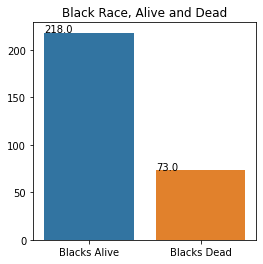

In [85]:
plt.figure(figsize=(4,4))
ax = sns.barplot(x=["Blacks Alive", "Blacks Dead"], y=[len(black_alive), len(black_dead)])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Black Race, Alive and Dead")

# THE OTHER RACES

**Step 16**: We will determine the number of other races that are alive and those that are dead. Don't forget that there there is a total of **320** other races.

In [86]:
# let us determine the other race in total
total_otherrace = df.loc[df["Race"]=="Other"][["Race", "Status"]]

# Let us determine the Other races that are alive
other_alive = total_otherrace.loc[total_otherrace["Status"]=="Alive"]

# let us determine the Other races that are dead
other_dead = total_otherrace.loc[total_otherrace["Status"]=="Dead"]

print("Total of Other race: ", len(total_otherrace))
print("\nOther Races that are Alive: ", len(other_alive))
print("\nOther Races that are dead: ", len(other_dead))

print("\n% of Other Races that are alive from the total: ", round((len(other_alive)/len(total_otherrace)*100)), "%")
print("\n% of Other Races that died from the total: ", round((len(other_dead)/len(total_otherrace)*100)), "%")


Total of Other race:  320

Other Races that are Alive:  287

Other Races that are dead:  33

% of Other Races that are alive from the total:  90 %

% of Other Races that died from the total:  10 %


From the Output, we can see that only **10%** of the other races died while **90%** are alive.

**Observations about the Races Variable of our data**

According to the data:
* The **Black** race has a higher tendency to die from breast cancer as **25%** of their total population died from it. Slightly followed is the **White** race which has **15%** of their population die from breast cancer.
* The **Other** races has a lower tendency to die from breast cancer as only **10%** of their total population died from it.

Let us present this using a visual:

Text(0.5, 1.0, '% Death in all the Races')

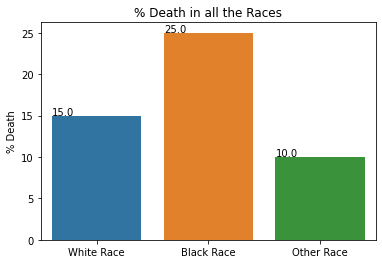

In [87]:
races = pd.DataFrame({"White Race":[round(len(white_dead)/len(total_white)*100)],"Black Race": [round(len(black_dead)/len(total_black)*100)], "Other Race":[round(len(other_dead)/len(total_otherrace)*100)]})

ax = sns.barplot(data=races)
for p in ax.patches:
     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.ylabel("% Death")
plt.title("% Death in all the Races")
                                                                                                                                                 

# MARITAL STATUS

**Step 17**: We obtain the unique value counts of the **Marital Status** variable

In [88]:
# lets look at the marital status
marital_status = df["Marital Status"].value_counts()
marital_status


Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: Marital Status, dtype: int64

From the output above, we can see that narried patients takes a larger percentage of the total patients in the dataset.

# MARRIED PATIENTS

**Step 18**: We obtain the number of married patients that are alive and those that are dead of all the **2643** married patients. 

In [89]:
# let us determine the married patients in total
total_married = df.loc[df["Marital Status"]=="Married"][["Marital Status", "Status"]]

# Let us determine the White race that are alive
married_alive = total_married.loc[total_married["Status"]=="Alive"]

# let us determine the White race that are dead
married_dead = total_married.loc[total_married["Status"]=="Dead"]

print("Total of Married patients: ", len(total_married))
print("\nMarried patients that are Alive: ", len(married_alive))
print("\nMarried patients that are dead: ", len(married_dead))

print("\n% of Married patients who are alive: ", round((len(married_alive)/len(total_married)*100)), "%")
print("\n% of Married patients who died ", round((len(married_dead)/len(total_married)*100)), "%")

Total of Married patients:  2643

Married patients that are Alive:  2285

Married patients that are dead:  358

% of Married patients who are alive:  86 %

% of Married patients who died  14 %


From the output we can see that **14%** of married patients died, while **86%** are alive.

# SINGLE PATIENTS

**Step 18**: We obtain the number of Single patients that are alive and those that are dead of all the **615** single patients. 

Before we do that, we notice that there is a mistake (as shown in the output below) in the name for single patients. It is given as **"Single "** instead of **"Single"**. So lets quickly change that.

In [90]:
df["Marital Status"].unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

Now let's change **"Single "** to **"Single"** using the **str.replace()** function in the code below:

In [91]:
df["Marital Status"].replace("Single ", "Single", inplace=True)

Now lets check for the unique values in the **Marital Status** column.

In [92]:
df["Marital Status"].unique()

array(['Married', 'Divorced', 'Single', 'Widowed', 'Separated'],
      dtype=object)

**Bravo!**

Now let's proceed with the **Step 18** which will help us determing tne number of Single patients who are alive and those that are dead. Don't forget, we have **615** patients that are single.

In [93]:
# let us determine the married patients in total
total_single = df.loc[df["Marital Status"]=="Single"][["Marital Status", "Status"]]

# Let us determine the White race that are alive
single_alive = total_single.loc[total_single["Status"]=="Alive"]

# let us determine the White race that are dead
single_dead = total_single.loc[total_single["Status"]=="Dead"]

print("Total of Married patients: ", len(total_single))
print("\nMarried patients that are Alive: ", len(single_alive))
print("\nMarried patients that are dead: ", len(single_dead))

print("\n% of Single patients are alive: ", round((len(single_alive)/len(total_single)*100)), "%")
print("\n% of Single patients died ", round((len(single_dead)/len(total_single)*100)), "%")

Total of Married patients:  615

Married patients that are Alive:  511

Married patients that are dead:  104

% of Single patients are alive:  83 %

% of Single patients died  17 %


We can see that of all the 615 patients, only **83%** are alive while **17%** of the single patients died.

# DIVORCED PATIENTS

**Step 19**: We obtain tne number of divorced patients who are alive and those that are dead. Don't forget, we have **486** divorced patients.

In [94]:
# let us determine the married patients in total
total_divorce = df.loc[df["Marital Status"]=="Divorced"][["Marital Status", "Status"]]

# Let us determine the White race that are alive
divorce_alive = total_divorce.loc[total_divorce["Status"]=="Alive"]

# let us determine the White race that are dead
divorce_dead = total_divorce.loc[total_divorce["Status"]=="Dead"]

print("Total of Divorced patients: ", len(total_divorce))
print("\nDivorced patients that are Alive: ", len(divorce_alive))
print("\nDivorced patients that are dead: ", len(divorce_dead))

print("\n% of Divorced patients are alive: ", round((len(divorce_alive)/len(total_divorce)*100)), "%")
print("\n% of Divorced patients died ", round((len(divorce_dead)/len(total_divorce)*100)), "%")

Total of Divorced patients:  486

Divorced patients that are Alive:  396

Divorced patients that are dead:  90

% of Divorced patients are alive:  81 %

% of Divorced patients died  19 %


From the output above, we see that of all the **486** Divorced patients, **81%** are alive while **19%** are dead.

# WIDOWED PATIENTS

**Step 20**: We obtain the number of Widowed patients, those alive and those that are dead.

In [95]:
# let us determine the married patients in total
total_widowed = df.loc[df["Marital Status"]=="Widowed"][["Marital Status", "Status"]]

# Let us determine the White race that are alive
widowed_alive = total_widowed.loc[total_widowed["Status"]=="Alive"]

# let us determine the White race that are dead
widowed_dead = total_widowed.loc[total_widowed["Status"]=="Dead"]

print("Total of Widowed patients: ", len(total_widowed))
print("\nWidowed patients that are Alive: ", len(widowed_alive))
print("\nWidowed patients that are dead: ", len(widowed_dead))

print("\n% of Widowed patients are alive: ", round((len(widowed_alive)/len(total_widowed)*100)), "%")
print("\n% of Widowed patients died ", round((len(widowed_dead)/len(total_widowed)*100)), "%")

Total of Widowed patients:  235

Widowed patients that are Alive:  186

Widowed patients that are dead:  49

% of Widowed patients are alive:  79 %

% of Widowed patients died  21 %


From the output above, widowed patiens who are alive makes up **79%** while **21%** died. It is so sad, loliness must have contributed to their death.

# SEPARATED PATIENTS

**Step 21**: We take a look at the Separated patients. We will their total number and also determine those who are alive and those who died.


In [96]:
# let us determine the married patients in total
total_separated = df.loc[df["Marital Status"]=="Separated"][["Marital Status", "Status"]]

# Let us determine the White race that are alive
separated_alive = total_separated.loc[total_separated["Status"]=="Alive"]

# let us determine the White race that are dead
separated_dead = total_separated.loc[total_separated["Status"]=="Dead"]

print("Total of Widowed patients: ", len(total_separated))
print("\nWidowed patients that are Alive: ", len(separated_alive))
print("\nWidowed patients that are dead: ", len(separated_dead))

print("\n% of Widowed patients are alive: ", round((len(separated_alive)/len(total_separated)*100)), "%")
print("\n% of Widowed patients died ", round((len(separated_dead)/len(total_separated)*100)), "%")

Total of Widowed patients:  45

Widowed patients that are Alive:  30

Widowed patients that are dead:  15

% of Widowed patients are alive:  67 %

% of Widowed patients died  33 %


From the output we can see that the percentage of separated patients that died is **33%** while those that are alive are **67%**. This shows that a patient being separated and having breast cancer at the same time is more liable to die.

**Observations about the Races Variable of our data:**

According to our data:

* **Separated** patients has the higher tendency to die. This is so as about **33%** of its total population died from breast cancer. This may be as a result of loneliness and not being able to move on with their lives.
* The **Widowed** patients recorded as the second highest death in its total population. Having recorded **21%** death of its total population. This must have been as a result of loneliness.
* The **Divorced** patients is third on the list with a *19%* death of its total population.
* Followed closely to the **Divorced** patients is the **Single** patients having *17%* death of its total population.
* The **Married** patients has the least number of death of its total patients with **14%** death of its total population. The reason for this is not far-fetched: the support from the partner and the family members must have helped.

**Step 22:** We will present a visual representation of the %death in all the marital statuses using the code below:

Text(0.5, 1.0, '% Death in all the Marital Statuses')

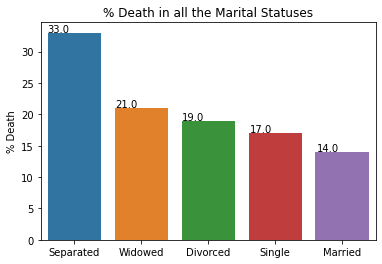

In [97]:
marital_status = pd.DataFrame({"Separated" : [round(len(separated_dead)/len(total_separated)*100)],
                               "Widowed" : [round(len(widowed_dead)/len(total_widowed)*100)],
                               "Divorced": [round(len(divorce_dead)/len(total_divorce)*100)],
                               "Single" : [round(len(single_dead)/len(total_single)*100)],
                               "Married" : [round(len(married_dead)/len(total_married)*100)]})
ax = sns.barplot(data=marital_status)
for p in ax.patches:
     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.ylabel("% Death")
plt.title("% Death in all the Marital Statuses")
                                       

# 2. MACHINE LEARNING

**Step 23**: Lets look at our data statistical description once again:

In [98]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


**Step 24**: We will take no chance by taking care of missing values:

In [99]:
df.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

We can see that our data contains no missing values


**Step 25:** We will take another look at our data to obtain their dtypes.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

**Step 26**: We will  look at our columns again:

In [101]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

Notice that the we need to change the **"T Stage "** co **"T Stage"**

In [102]:
df.rename(columns={"T Stage ": "T Stage"}, inplace=True)
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

**Step 27:** Lets obtain the categorical variables of our dataset:

In [103]:
s = df.dtypes=="object"
categorical_variables = list(s[s].index)
categorical_variables

['Race',
 'Marital Status',
 'T Stage',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Estrogen Status',
 'Progesterone Status',
 'Status']

**Step 28**: Lets obtain the numerical variables of our dataset

In [104]:
t = df.dtypes=="int64"
numerical_variables = list(t[t].index)
numerical_variables

['Age',
 'Tumor Size',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months']

# ENCODING

**Step 29**: We encode the values of each the categorical variables of our dataset. This is so because a model only understands numbers.

In [105]:
from sklearn.preprocessing import LabelEncoder

# encoding all variables of the data 
encoding = LabelEncoder()

df["Race"] = encoding.fit_transform(df['Race']).astype("int64")
df["Marital Status"] = encoding.fit_transform(df["Marital Status"]).astype("int64")
df["T Stage"] = encoding.fit_transform(df["T Stage"]).astype("int64")
df["N Stage"] = encoding.fit_transform(df["N Stage"]).astype("int64")
df["6th Stage"] = encoding.fit_transform(df["6th Stage"]).astype("int64")
df["differentiate"] = encoding.fit_transform(df["differentiate"]).astype("int64")
df["Grade"] = encoding.fit_transform(df["Grade"]).astype("int64")
df["A Stage"] = encoding.fit_transform(df["A Stage"]).astype("int64")
df["Estrogen Status"] = encoding.fit_transform(df["Estrogen Status"]).astype("int64")
df["Progesterone Status"] = encoding.fit_transform(df["Progesterone Status"]).astype("int64")
df["Status"] = encoding.fit_transform(df["Status"]).astype("int64")

**Step 30**: Now let us view our encode dataset

In [106]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


Taking a good look at our target variable **"Status"**, we need to observe the new label for **"Alive"** and **"Dead"***

In [107]:
df["Status"].unique()

array([0, 1])

From the output we can see that **"Alive"** takes **0** while **"Dead"** takes **1**.

Now lets see the information about our updated dataset:

In [108]:
# lets observe the dtypes of our variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int64
 2   Marital Status          4024 non-null   int64
 3   T Stage                 4024 non-null   int64
 4   N Stage                 4024 non-null   int64
 5   6th Stage               4024 non-null   int64
 6   differentiate           4024 non-null   int64
 7   Grade                   4024 non-null   int64
 8   A Stage                 4024 non-null   int64
 9   Tumor Size              4024 non-null   int64
 10  Estrogen Status         4024 non-null   int64
 11  Progesterone Status     4024 non-null   int64
 12  Regional Node Examined  4024 non-null   int64
 13  Reginol Node Positive   4024 non-null   int64
 14  Survival Months         4024 non-null   int64
 15  Status               

**Bravo!** we are now good to go!

**Step 31**: We want to see how each variables are distributed across the dataset.

In the code below, we will start with looking at how the **"Race"**, **"Marital Status"**, **"T Stage"**, **"N Stage"**, and the **"6th Stage"** will compare to each other as well as our target variable, **"Status"**. We will do these because we want to be careful and also to capture every details. We will create a variable "first_features" that will take the list of the aforementioned features.

In [109]:
first_features = df[['Race','Marital Status','T Stage','N Stage','6th Stage', "Status"]]

<Figure size 1080x576 with 0 Axes>

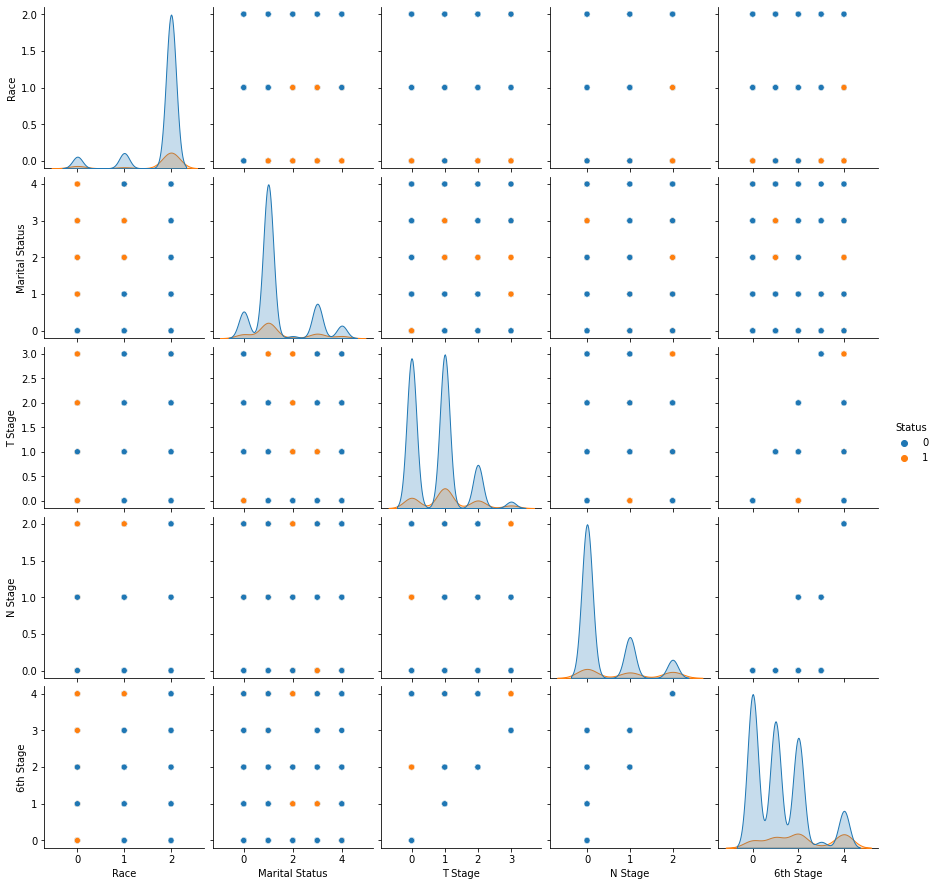

In [110]:
plt.figure(figsize=(15,8))
sns.pairplot(data=first_features, hue="Status")

**Step 32:** Now let us take a look at the other features and see how they compare with each other and the target variable as well. We will create a variable, "second_features", that will take the remaining features as a list.

<Figure size 1080x576 with 0 Axes>

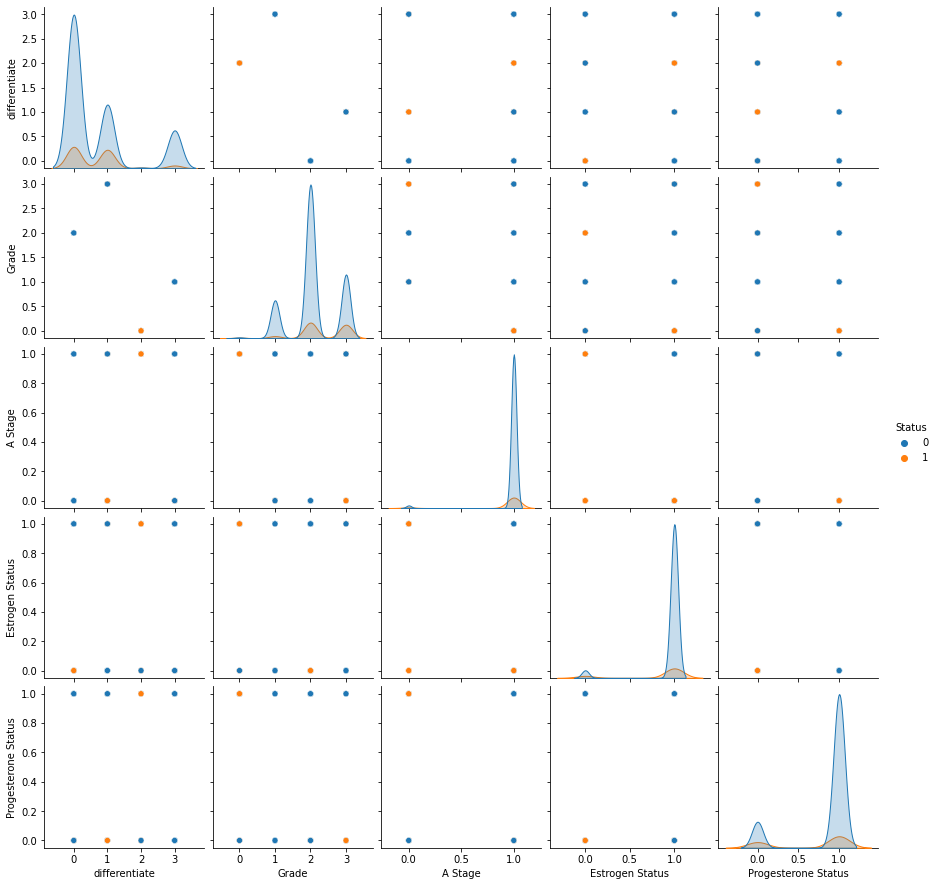

In [111]:
second_features = df[['differentiate',
 'Grade',
 'A Stage',
 'Estrogen Status',
 'Progesterone Status',
 'Status']]

plt.figure(figsize=(15,8))
sns.pairplot(second_features, hue="Status")

Below is another way to look at our data set distributions.

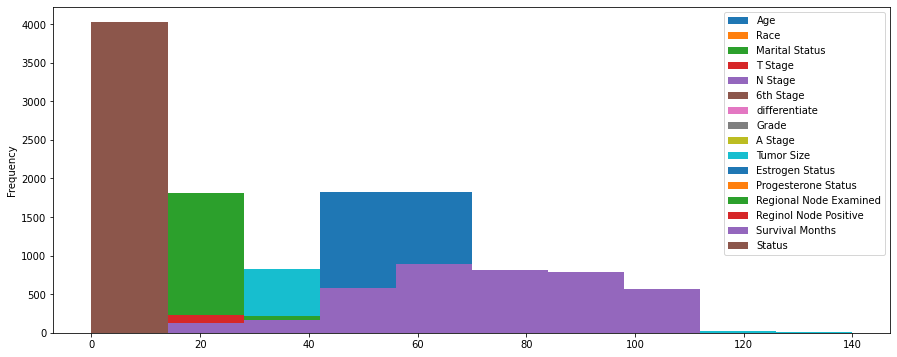

In [112]:

df.plot(kind="hist", figsize=(15,6))
plt.show()

**Step 33:** We will look at how our variables relates to each other by looking at their correlation.

In [113]:
# obtaining correlation
correlation = df.corr()
correlation

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
Age,1.000000,0.079734,0.050832,-0.066914,0.002883,-0.018741,0.015697,-0.093216,0.020860,-0.077215,0.059787,-0.021269,-0.033345,0.012586,-0.009390,0.055921
Race,0.079734,1.000000,-0.111417,0.001082,-0.032125,-0.025282,-0.018759,-0.057032,0.007005,-0.004082,0.057652,0.034351,-0.004778,-0.014604,0.040571,-0.050040
Marital Status,0.050832,-0.111417,1.000000,0.009318,0.013168,0.002989,0.031639,-0.004283,0.004936,0.007407,-0.017895,-0.013485,-0.004285,0.005849,-0.025593,0.033289
T Stage,-0.066914,0.001082,0.009318,1.000000,0.277015,0.606711,-0.031355,0.110220,-0.221124,0.809176,-0.060954,-0.057633,0.114102,0.243075,-0.085718,0.154699
N Stage,0.002883,-0.032125,0.013168,0.277015,1.000000,0.881880,-0.036249,0.148791,-0.260573,0.277905,-0.101995,-0.093723,0.328276,0.838073,-0.139577,0.255772
6th Stage,-0.018741,-0.025282,0.002989,0.606711,0.881880,1.000000,-0.042286,0.169986,-0.291962,0.513971,-0.105614,-0.101246,0.317219,0.773963,-0.144837,0.257636
differentiate,0.015697,-0.018759,0.031639,-0.031355,-0.036249,-0.042286,1.000000,-0.365422,-0.008977,-0.028391,-0.021826,0.008957,-0.057248,-0.028339,-0.004500,-0.018513
Grade,-0.093216,-0.057032,-0.004283,0.110220,0.148791,0.169986,-0.365422,1.000000,-0.043701,0.099539,-0.186770,-0.175816,0.083446,0.122931,-0.058408,0.134170
A Stage,0.020860,0.007005,0.004936,-0.221124,-0.260573,-0.291962,-0.008977,-0.043701,1.000000,-0.123883,0.065570,0.026530,-0.069010,-0.232849,0.070109,-0.096584
Tumor Size,-0.077215,-0.004082,0.007407,0.809176,0.277905,0.513971,-0.028391,0.099539,-0.123883,1.000000,-0.059585,-0.069879,0.104352,0.242322,-0.086901,0.134205


Its best we show a plot for this output. 

<AxesSubplot:>

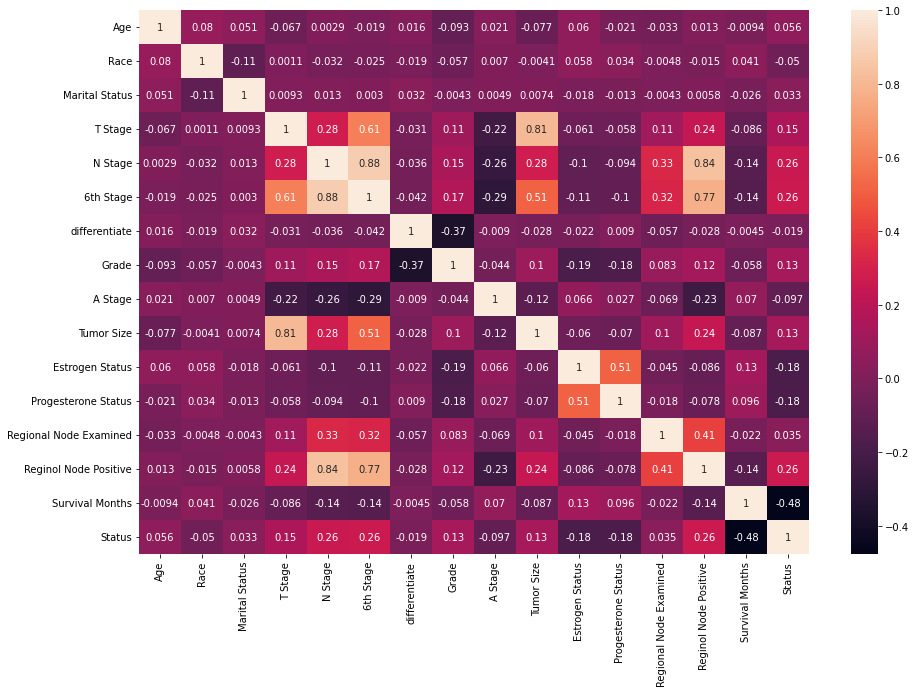

In [114]:
# lets show the plot
plt.figure(figsize=(15, 10))
sns.heatmap(data=correlation, annot=True)

We can see from the output above that **"T Stage"**, **N Stage**, **"6th Stage"**, **"Grade"**, **"Tumor Size"** and **"Regional Node Positive"** has significant relationship with our target variable, **"Status"**.

That not withstanding, we will be making use of all the variables of our dataset.

# FEATURES AND TARGET VARIABLES

**Step 34:** We will be creating our features and target variables.

In [115]:
# choosing features and Target
X = df.drop("Status", axis=1)
y = df.Status

Let us take a closer look at our features and variable data.

In [116]:
print("Our Features: ", X.head())
print("\nOur Target: ", y.head())

Our Features:     Age  Race  Marital Status  T Stage  N Stage  6th Stage  differentiate  \
0   68     2               1        0        0          0              1   
1   50     2               1        1        1          2              0   
2   58     2               0        2        2          4              0   
3   58     2               1        0        0          0              1   
4   47     2               1        1        0          1              1   

   Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0      3        1           4                1                    1   
1      2        1          35                1                    1   
2      2        1          63                1                    1   
3      3        1          18                1                    1   
4      3        1          41                1                    1   

   Regional Node Examined  Reginol Node Positive  Survival Months  
0                      24        

# SPLITING THE DATA

**Step 35:** We will be splitting our data set into training ans testing/validation. We will be using **70%** of our data for training and **30%** will be for testing.

In [125]:
# splitting our data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3)
print("X_train: ", len(X_train))
print("y_train: ", len(y_train))
print("X_valid: ",len(X_valid))
print("y_valid: ",len(y_valid))

X_train:  2816
y_train:  2816
X_valid:  1208
y_valid:  1208


# STANDARDIZING OUR DATA



**Step 36:** We need to standardize our training data.

This is done so as to improve the quality of our data. This process will help resize the distribution of distribution of the values of our datset in such a way that the mean of observed values becomes **0** while the standard deviation becomes **1**.

In [126]:
# importinng the standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# standardizing our data
X_train= scaler.fit_transform(X_train)
X_valid= scaler.fit_transform(X_valid)


# IMPORTING OUR MODELS

**Step 37:** Importing the models and metrics we intend to use.

In [127]:
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

**Step 38:** We create a dictionary variable, **"models"**, to help us house all our models.

In [128]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting Classifier':GradientBoostingClassifier(),
         'Support Vector Machine': SVC(),
         'Stochastic Gradien Descent': SGDClassifier(),
         'Naive Bayes': GaussianNB(),
         'xgb Classifier': XGBClassifier()}

# TRAINING/FITTING/ACCURACY SCORE

**Step 39**: We create a function, **get_score()**, to help us obtaining the cross validation score of our various models.

In [129]:
def get_score(models, X_train, X_valid, y_train, y_valid):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model,
                                             X_valid,
                                             y_valid,
                                            scoring='accuracy',
                                            cv=3
                                            ).mean()

    return model_scores

**Step 40:** We obtain the accuracy of our models.

In [131]:
model_scores = get_score(models,X_train,X_valid,y_train,y_valid)
model_scores = pd.DataFrame([model_scores])
model_scores = model_scores.melt(var_name="Models", value_name ="Accuracy")
model_scores.sort_values(by="Accuracy", ascending=False)

,Models,Accuracy
2,Random Forest,0.893210
3,Gradient Boosting Classifier,0.891553
7,xgb Classifier,0.883280
0,Logistic Regression,0.881618
4,Support Vector Machine,0.872511
1,KNN,0.870030
5,Stochastic Gradien Descent,0.837755
6,Naive Bayes,0.805472


From the above, we can see the accuracy score of our models.

# Authors Note
Please do well to let me know what your thoughts are with regards to this notebook. By so doing, I will learn from it and get better. Thank you so much for your time! GRACIAS!
